In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as lin

In [70]:
def f(x,i):
    return x * a[i] + c[i]
    

In [146]:

"""control factor of total number of lines!!"""
ss = 20                 # total line number
dens = 5               # point in dx is 1
l_lim = -20            # lower limit of grid
h_lim = 20             # upper limit of grid 
d_lim = h_lim - l_lim              ## do not need to change!!! # delta grid width

s_sum = 0          # s lines`s solution point number!!
for i in range(ss):
    s_sum += i

x = np.linspace(l_lim,h_lim,d_lim*dens)
y = np.ones((ss,d_lim*dens))


f_y = np.ones([ss,d_lim*dens])
f_y.size

4000

In [356]:
a = np.random.randn(ss,1) * 5
c =  np.random.randn(ss,1) * 2

for i in range(ss):
    f_y[i] = x
f_y = x * a + c

sol_point = np.zeros((3,s_sum))
k = 0
for i in range(ss):
    for j in range(ss-i-1):
        sol_point[0][k] = (c[i] - c[i+j+1]) / (a[i+j+1] - a[i])
        sol_point[1][k] = (c[i]*a[i+j+1] - a[i]*c[i+j+1]) / (a[i+j+1] - a[i])
        k += 1

for k in range(len(sol_point[0])):
    sol_point[2][k] =np.sqrt((sol_point[0][k] - sol_point[0].mean())**2 + (sol_point[1][k] - sol_point[1].mean())**2)
        

xx, yy = np.meshgrid(x,x)
sol = np.zeros((d_lim*dens,d_lim*dens))
sol.size

for i in range(d_lim*dens):
    for j in range(d_lim*dens):
        sol[i][j] = (  (np.abs(a)/np.sqrt(a*a+1))  *  np.abs(xx[i,j]-((yy[i,j]/a)-c/a ))  ).sum()

ii = (sol.argmin() // (d_lim*dens))
print(ii)
jj = sol.argmin() - (d_lim*dens * ii) 



""" make the matrice of A"""
aa = np.ones((ss,2)).T
aa[0] = -a.reshape(1,-1)
A = aa.T

A_pse = lin.inv(np.dot(A.T,A))
ATA = np.dot(A_pse, A.T)
B = np.dot(ATA,c)
ans = np.array([x[jj], x[ii]])

# print(np.sqrt((ans[0] - B[0]) ** 2 + (ans[1] - B[1]) ** 2))
# print(sol.min())




100


In [326]:
# x 방향으로 3번 !!
sol_point0 = sol_point.T[(sol_point[0] - sol_point[0].mean())**2 < sol_point[0].var()]
sol_point0 = sol_point0.T
sol_point1 = sol_point0.T[(sol_point0[0] - sol_point0[0].mean())**2 < sol_point0[0].var()]
sol_point1 = sol_point1.T
sol_point2 = sol_point1.T[(sol_point1[0] - sol_point1[0].mean())**2 < sol_point1[0].var()]
sol_point2 = sol_point2.T

In [329]:
# y 방향으로 3번!!
sol_point0 = sol_point.T[(sol_point[1] - sol_point[1].mean())**2 < sol_point[1].var()]
sol_point0 = sol_point0.T
sol_point1 = sol_point0.T[(sol_point0[1] - sol_point0[1].mean())**2 < sol_point0[1].var()]
sol_point1 = sol_point1.T
sol_point2 = sol_point1.T[(sol_point1[1] - sol_point1[1].mean())**2 < sol_point1[1].var()]
sol_point2 = sol_point2.T

In [338]:
# x 한번 y 한번 
sol_point0 = sol_point.T[(sol_point[0] - sol_point[0].mean())**2 < sol_point[0].var()]
sol_point0 = sol_point0.T
sol_point1 = sol_point0.T[(sol_point0[1] - sol_point0[1].mean())**2 < sol_point0[1].var()]
sol_point1 = sol_point1.T

In [357]:
# 거리로 !! 
sol_point0 = sol_point.T[(sol_point[2] - sol_point[2].mean())**2 < 0.3 * sol_point[2].var()]
sol_point0 = sol_point0.T
sol_point1 = sol_point0.T[(sol_point0[2] - sol_point0[2].mean())**2 < 0.5 * sol_point0[2].var()]
sol_point1 = sol_point1.T
sol_point2 = sol_point1.T[(sol_point1[2] - sol_point1[2].mean())**2 < 0.5 *sol_point1[2].var()]
sol_point2 = sol_point2.T

In [358]:
ans

array([-0.10050251,  0.10050251])

In [359]:
print(sol_point.mean(axis=1))
print(sol_point0.mean(axis=1))
print(sol_point1.mean(axis=1))
print(sol_point2.mean(axis=1))

[ 0.90473981  0.60872725  5.81110955]
[-0.14908034 -0.50090642  2.75102403]
[-0.19867817 -0.31915738  2.11108094]
[-0.37283538  0.14631196  1.9135243 ]


In [81]:
sol_point1.std(axis=1)

array([ 4.22692397,  9.35103438])

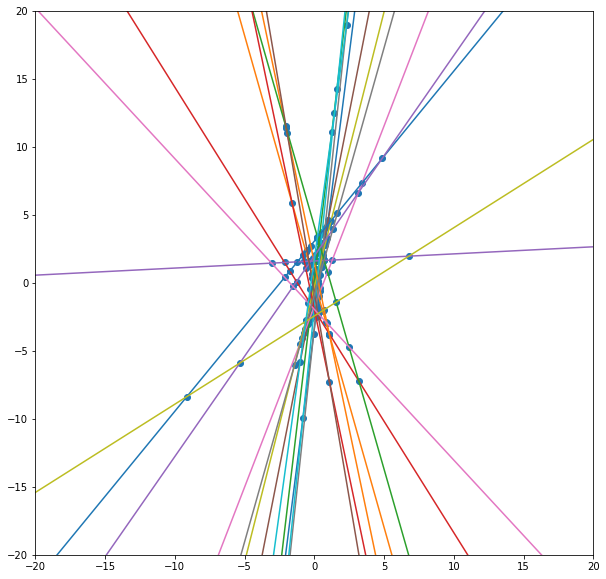

In [257]:


"""control total number of lines;;"""
k = ss

plt.figure(figsize=(10,10))
for i in range(k):
    plt.plot(x, f_y[i])
plt.ylim([l_lim,h_lim])
plt.xlim([l_lim,h_lim])
plt.scatter(sol_point[0],sol_point[1])
plt.show()

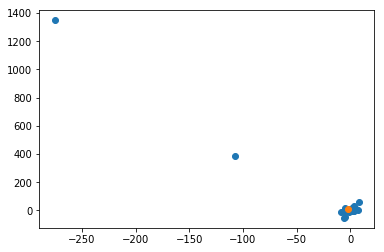

[-1.94391538  9.50804724]


In [258]:

plt.scatter(sol_point[0],sol_point[1])
plt.scatter(sol_point[0].mean(), sol_point[1].mean())
plt.show()
print ( sol_point.mean(axis=1))